<a href="https://colab.research.google.com/github/ndtuan10/Neural-network-and-Genetic-algorithms_CS410.M11.KHCL/blob/main/Logistic%20Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

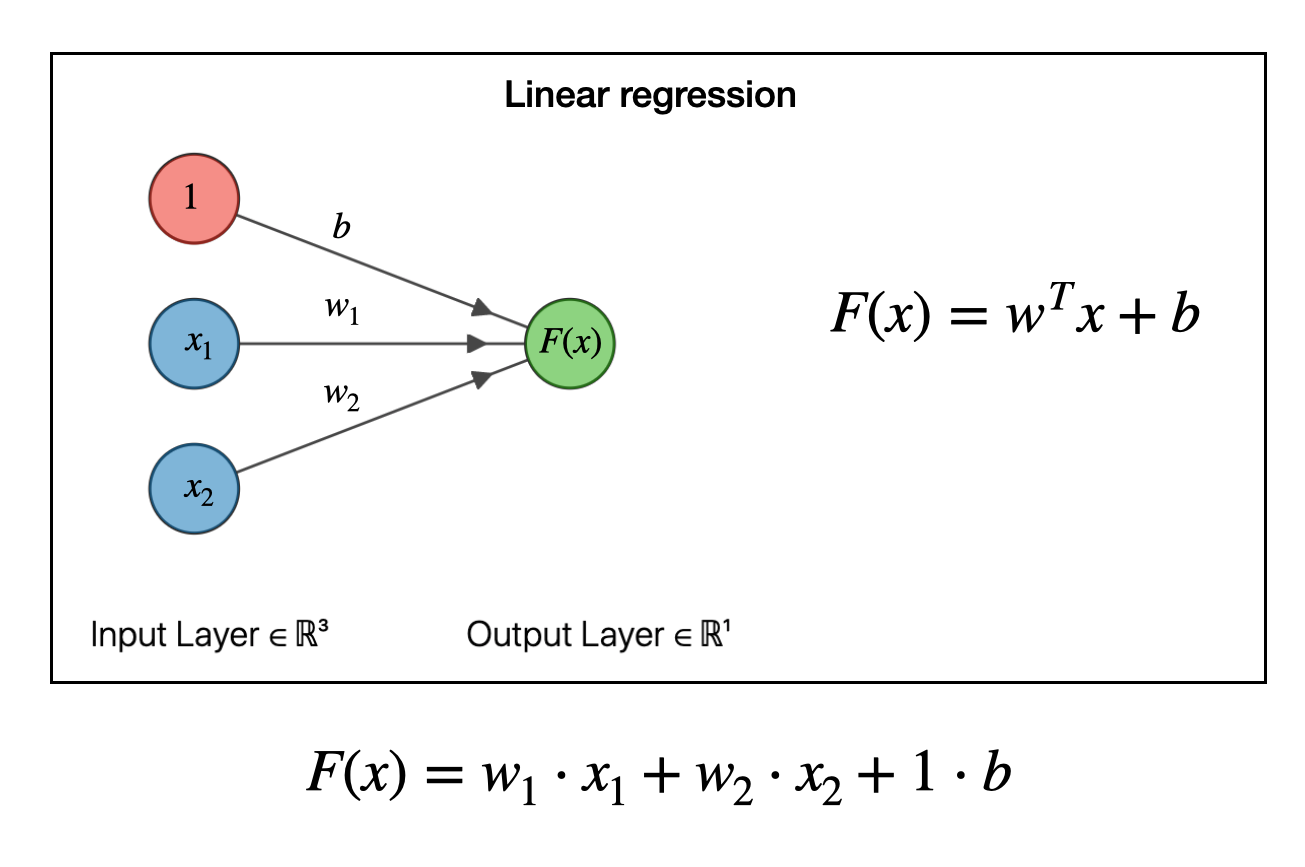

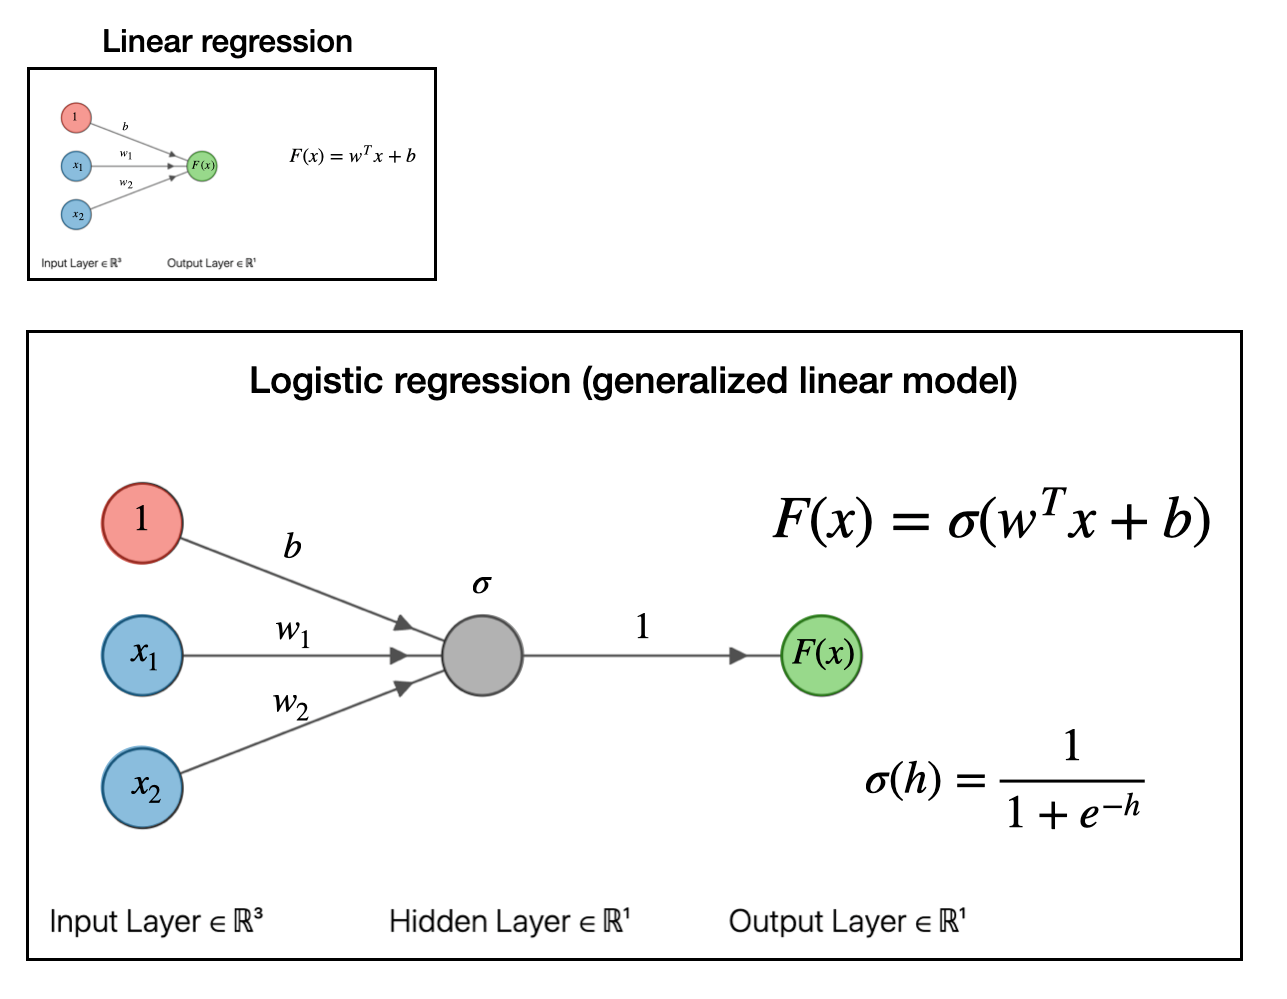

# Logistic Regression

## Problem
We want to build a model to *discriminate* the following **red** and **blue** points in 2-dimensional space:

In [1]:
#@title
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])
y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])
colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap):
    plt.grid()
    plt.xlim([-2.0, 2.0])
    plt.ylim([-2.0, 2.0])
    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title('Input 2D points', size=20)
    plt.scatter(X[:, 0], X[:,1], s=50, c=colormap[y])

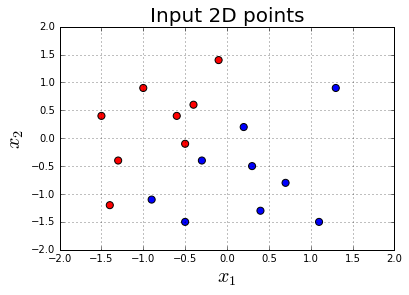

In [2]:
#@title
plot_scatter(X, y, colormap)

# Logistic regression

### Problem formulation 
Given an *input* point in 2-dimensional space $\textbf{x}=(x_1,x_2)$, we want to **predict** the *output* to be either $0$ (red) or $1$ (blue). More precisely, we want to predict the **probability** that the point is a blue point (in the case that we have only 2 classes red and blue).

* For example, if we are building a machine learning system for a bank to classify whether a credit card application would be accepted or rejected.
* Usually, it is difficult to say if one application should be surely (100%) accepted or rejected.
* Normally, it is more "natural" to predict the probability that a credit card owner can't pay the debt.

* Another example, in a hospital, we want to build an ML system to predict whether a patient would have a heart attack or not in the future.
* It is not "natural" to concretely classify whether a patient would have a heart attack or not.
* It is more natural to predict the probability that a patient would have a heart attack.

* Usually, we would give a **score** to each input.
* Based on this score, we give out a probability that the input belongs to a class.

$\texttt{credit score}=w_1 x_1 + w_2 x_2 + w_3 x_3 + b$

* If $x_1$ corresponds to salary, then $w_1$ should be some positive value.
* If $x_2$ corresponds to debt, then $w_2$ should be some negative value.
* If $x_3$ corresponds to hair color, then $w_3$ should be something like 0.0 (because this is not an important feature).

* If the total $\texttt{credit score}>0$, we would say this is a good application, and it would have higher probability to be accepted (i.e., more than 50% to be accepted).
* If the total $\texttt{credit score}<0$, we would say this is a bad application, and it would have lower probability to be accepted (i.e., less than 50% to be accepted).

We need a function to convert $\texttt{score}$ to probability values.

### Sigmoid Logistic function
We employ the **sigmoid** function as follows.

$\begin{equation}
a = g(z) = \frac{1}{1+e^{-z}}
\end{equation}$

where $z = \texttt{score}= w_1 x_1 + w_2 x_2 + b$

* $a$: the probability
* $z$: the score

In [3]:
sigmoid = lambda z: 1/(1+np.exp(-z))

Let's plot the sigmoid function.

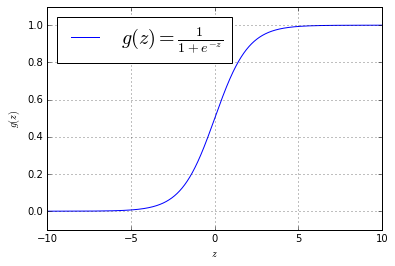

In [4]:
def plot_sigmoid():
    plt.grid()
    plt.xlim(left=-10.0, right=10.0)
    plt.ylim(bottom=-0.1, top=1.1)
    zs = np.arange(-10, 10, 0.001)
    plt.plot(zs, sigmoid(zs), label=r'$g(z)=\frac{1}{1+e^{-z}}$')

    plt.legend(loc='upper left', fontsize=20)
    plt.xlabel('$z$')
    plt.ylabel('$g(z)$')
plot_sigmoid()

We can see that $0<g(z)<1$ for all $z\in \mathbb{R}$.

We have $z = w_1 x_1 + w_2 x_2 + b = \textbf{w}^T\textbf{x} + b$.

Therefore, $0<g(\textbf{x})<1$ for all $\textbf{x}\in \mathbb{R}^2$.

The **sigmoid** function can be used to *predict* the **probability** of the class a data point $\textbf{x}=(x_1,x_2)$ belongs to.

$\begin{equation}
\text{Predicted class} = \begin{cases}
    0, & \text{if $g(\textbf{x})<0.5$}\\
    1, & \text{otherwise}.
\end{cases}
\end{equation}$

## Prediction examples

Assume someone already learned $\textbf{w}$ and $b$ for us.

In [5]:
sigmoid = lambda x: 1/(1+np.exp(-x))

w = np.array([6.33, -4.22])
b = 1.99

In [6]:
x = np.array([1.1, -0.6])
# Predict the probability that a data point is a BLUE point
print(w.dot(x)+b)
print(sigmoid(w.dot(x)+b))

11.485000000000001
0.9999897169153853


In [7]:
x = np.array([-1.5, 0.0])
# Predict the probability that a data point is a BLUE point
print(w.dot(x)+b)
print(sigmoid(w.dot(x)+b))

-7.505000000000001
0.0005500231583811739


In [8]:
x = np.array([0.0, 0.0])
# Predict the probability that a data point is a BLUE point
print(w.dot(x)+b)
print(sigmoid(w.dot(x)+b))

1.99
0.8797431375322491


### Training
We learn **weights** $\textbf{w}=(w_1,w_2)$ and **bias** $b$ (can be written as $w_0$) from the dataset.


# Maximum Likelihood Estimation (MLE) and Loss Function of Logistic Regression

We need to learn $\textbf{w}=(w_1,w_2)$ and $b$ that best discriminate **red** and **blue** points.

Suppose we have two points:

$\begin{equation}
\textbf{x}^{(1)} = [-0.1, 1.4],\quad y^{(1)} = 0
\end{equation}$

and

$\begin{equation}
\textbf{x}^{(2)} = [1.3, 0.9],\quad y^{(2)} = 1
\end{equation}$

We want a classifier that:
* produces very high $a$ when $y=1$, and
* produces very low $a$ when $y=0$.

We want that $a$ is very close to $y$. In other words,
* If $y=1$, we want to maximize $a$.
* If $y=0$, we want to maximize $1-a$.

We thus want to **maximize**:
$\begin{equation}
a^{y}. (1-a)^{(1-y)}
\end{equation}
$

Maximizing the above term is equal to maximizing:

$\begin{equation}
\log(a^y . (1-a)^{(1-y)})\\
=\log(a^y) + \log((1-a)^{(1-y)})\\
=y\log(a) + (1-y)\log(1-a)
\end{equation}$

In Machine Learning, we like to minimize.

Thus we want to **minimize**:

$\begin{equation}
L = -(y\log(a) + (1-y)\log(1-a))
\end{equation}$

$L$ is the cost function (or loss function) for **one sample**.

We need a cost function formula for **multiple samples** (e.g., the whole dataset).

### Example 1
We have 3 points belonging to the same class $y^{(1)}=y^{(2)}=y^{(3)}=1$.

We then have 2 classifiers, and their prediction results are as follows.
* Classifier 1: 0.9, 0.4, 0.8
* Classifier 2: 0.7, 0.7, 0.7

Which classifier is better?

**Maximum Likelihood Estimation (MLE)** answer this question by multiplying those numbers, and taking the maximum.
* Classifier 1: $0.9\times 0.4 \times 0.8=0.288$
* Classifier 2: $0.7\times 0.7 \times 0.7=0.343$

In this case, Classifier 2 is **more likely**.

### Example 2
We have 3 points belonging to the following classes class $y^{(1)}=y^{(3)}=1$ and $y^{(2)}=0$.

We then have 2 classifiers, and their prediction results are as follows.
* Classifier 1: 0.9, 0.4, 0.8
* Classifier 2: 0.7, 0.7, 0.7

Which classifier is better?

We calculate the likelihood of each classifier:
* Classifier 1 = $0.9^1(1-0.9)^{1-1} \times 0.4^0(1-0.4)^{1-0} \times 0.8^1(1-0.8)^{1-1}$ = 0.432
* Classifier 2 = $0.7 \times (1-0.7) \times 0.7$ = 0.147

In this case, Classifier 1 is **more likely**.

### MLE

Formally, for multiple samples, MLE wants to maximize the following:

$\begin{equation}
\prod_{i=1}^{N} a^{(i)^{y^{(i)}}}.(1-a^{(i)})^{{(1-y^{(i)})}}
\end{equation}$

which is called the **maximum likelihood**.

Maximizing the above is equal to maximizing the following:

$\begin{equation}
\log\big(\prod_{i=1}^{N} a^{(i)^{y^{(i)}}}.(1-a^{(i)})^{{(1-y^{(i)})}}\big)\\
=\sum_{i=1}^{N} \log(a^{(i)^{y^{(i)}}}.(1-a^{(i)})^{{(1-y^{(i)})}})\\
=\sum_{i=1}^{N}\big[\log(a^{(i)^{y^{(i)}}}) + \log((1-a^{(i)})^{(1-y^{(i)})}\big]\\
=\sum_{i=1}^{N}\big[ y^{(i)}\log(a^{(i)}) + (1-y^{(i)})\log(1-a^{(i)})\big]
\end{equation}$

Equivalently, we need to minimize the following:

$\begin{equation}
J = -\sum_{i=1}^{N}\big[ y^{(i)}\log(a^{(i)}) + (1-y^{(i)})\log(1-a^{(i)})\big]
\end{equation}$

where

$
a^{(i)} = \frac{1}{1+e^{-z^{(i)}}} = \frac{1}{1+e^{-(w_1 x^{(i)}_1 + w_2 x^{(i)}_2 + b)}}
$

Often, the notation $J$ is used to indicate the **cost function** for **all samples**, while the notation $L$ is used for **one sample**.

Note:

**Negative log likelihood (NLL)** in *logistic regression* is **Binary Cross-Entropy Loss**

**Negative log likelihood (NLL)** in *linear regression* is **Mean Squared Error Loss**

# Compute the derivatives by Chain Rule

Our logistic regression model have the following parameters: the weights $w_1, w_2$ and the bias $b$. To minimize the cost function $L$ of the model by Gradient Descent, we first need to find out the following derivatives:

$\frac{dL}{dw_1},\frac{dL}{dw_2},\frac{dL}{db}$

We have $g(z) = \frac{1}{1-e^{-z}}$, which is the sigmoid function.

### Computation Graph

For our 2D logistic regression, we have the following computation graph for **one sample**:
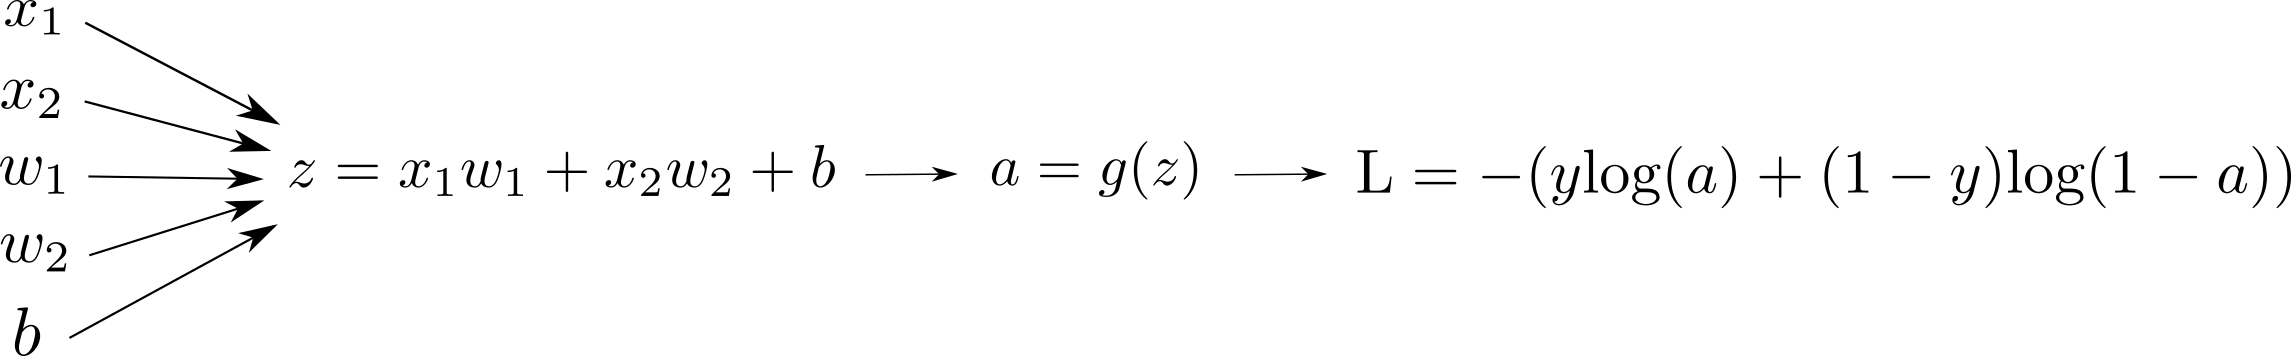

### Chain Rule
Applying chain rule, we get the followings:

$\begin{equation}
\frac{dL}{dw_1}=\frac{dL}{da}\frac{da}{dz}\frac{dz}{dw_1}
\end{equation}$

$\begin{equation}
\frac{dL}{dw_2}=\frac{dL}{da}\frac{da}{dz}\frac{dz}{dw_2}
\end{equation}$

$\begin{equation}
\frac{dL}{db}=\frac{dL}{da}\frac{da}{dz}\frac{dz}{db}
\end{equation}$

Let's do some calculus:

$\begin{equation}
z = w_1 x_1 + w_2 x_2 + b
\end{equation}$

Therefore,

$\begin{equation}
\frac{dz}{dw_1} = x_1
\end{equation}$


$\begin{equation}
\frac{dz}{dw_2} = x_2
\end{equation}$


$\begin{equation}
\frac{dz}{db} = 1
\end{equation}$

And,

$\begin{equation}
a = g(z) = \frac{1}{1+e^{-z}}
\end{equation}$

Therefore,

$
\frac{da}{dz} = -\frac{(1+e^{-z})'}{(1+e^{-z})^2}=-\frac{(e^{-z})'}{(1+e^{-z})^2}=\frac{e^{-z}}{(1+e^{-z})^2}\\
= \frac{1+e^{-z}-1}{(1+e^{-z})^2}\\
= \frac{1+e^{-z}}{(1+e^{-z})^2} - \frac{1}{(1+e^{-z})^2}\\
= \frac{1}{1+e^{-z}} - \frac{1}{(1+e^{-z})^2}\\
= g(z)-(g(z))^2 = g(z)(1-g(z)) = a(1-a)
$

We already computed $g(z)$ before, so we can re-use it when computing the derivate $\frac{da}{dz}$.

And,

$L = -(y\log(a)+(1-y)\log(1-a))$

Therefore,

$\frac{dL}{da}=\frac{d}{da}( -(y\log(a)+(1-y)\log(1-a)))\\
=\frac{d}{da}(-y\log(a)) + \frac{d}{da}(-(1-y)\log(1-a))\\
=\frac{-y}{a}+\frac{1-y}{1-a}
$

Combining all the above results, we have:

$
\frac{dL}{da}\frac{da}{dz} = \big(\frac{-y}{a}+\frac{1-y}{1-a}\big)(a(1-a))\\
= \frac{-y}{a}a(1-a)+\frac{1-y}{1-a}a(1-a)\\
=-y(1-a)+(1-y)a\\
=-y+ya +a -ya\\
=a-y
$

Finally,

$
\frac{dL}{dw_1} =\frac{dL}{da}\frac{da}{dz}\frac{dz}{dw_1} = (a-y)x_1
$

$
\frac{dL}{dw_2} =\frac{dL}{da}\frac{da}{dz}\frac{dz}{dw_2} = (a-y)x_2
$

$
\frac{dL}{db} =\frac{dL}{da}\frac{da}{dz}\frac{dz}{db} = (a-y)
$

$
\begin{bmatrix}
\frac{dL}{db}\\
\frac{dL}{dw_1}\\
\frac{dL}{dw_2}
\end{bmatrix}=
(a-y)
\begin{bmatrix}
1\\ x_1 \\ x_2
\end{bmatrix}
$

### Problem of the loss function L

$L = -(y\log(a) + (1-y)\log(1-a))$

We have $y\in\{0,1\}$ and $0<a<1$.

* What is the range of $L$?
* What is the range of $\log()$?

Let's plot the (natural) logarithm function.

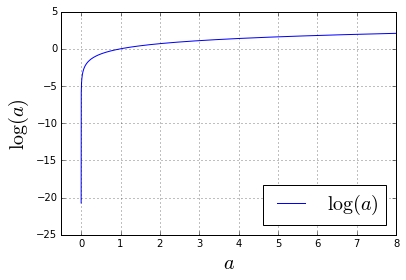

In [9]:
def plot_natural_log():
    plt.grid()
    plt.xlim(left=-0.5, right= 8.0)
    xs = np.arange(0.000000001, 8.0, 0.0001)
    plt.plot(xs, np.log(xs), label='$\log(a)$')
    
    plt.legend(loc='lower right', fontsize=20)
    plt.xlabel('$a$', fontsize=20)
    plt.ylabel('$\log(a)$', fontsize=20)
plot_natural_log()


Problems are:
* $\log(0)$ approaches to $-\infty$.
* $\log(a)$ becomes *unstable* for small values of $a$. A small change in $a$ can change $\log(a)$ dramatically.

We need to come up with a different formulation for $L$, which is:
* Mathematically the same, but
* Numerically stable.

We have

$
L = -(y\log(a)+(1-y)\log(1-a))
$

and

$a = \frac{1}{1+e^{-z}}$

Let's try to compute $L$ without computing $\log(a)$.

$L = -\big(y\log\big(\frac{1}{1+e^{-z}}\big)+(1-y)\log\big(1-\frac{1}{1+e^{-z}}\big)\big)\\
= -\big(y\log\big(\frac{1}{1+e^{-z}}\big)+(1-y)\log\big(\frac{e^{-z}}{1+e^{-z}}\big)\big)\\
= -(-y\log({1+e^{-z}})+(1-y)(\log(e^{-z})-\log(1+e^{-z})))\\
= -(-y\log({1+e^{-z}})+(1-y)(-z-\log(1+e^{-z})))\\
$

This is mathematically the same, and stable because everytime we compute $\log$, it is not in the unstable range.

In [10]:
def compute_loss(y, a):
    return -1 * (y * np.log(a) + (1-y) * np.log(1-a))

In [11]:
def compute_loss_numerically_stable(y, z):
    return -1 * (-y * np.log(1 + np.exp(-z)) +
                 (1-y) * (-z - np.log(1+np.exp(-z))))

For Linear Regression, we have the Normal Equation $(X^TX)^{-1}X^Ty$. This is a closed-form expression.

But for Logistic Regression, we don't have such a closed-form expression. We have to find the parameter value by using Gradient Descent.

# Applying Gradient Descent

In [12]:
learning_rate = 8.0 # A VERY LARGE LEARNING_RATE. THIS IS JUST FOR THIS DEMO.
num_epochs = 20

w_cache = []
b_cache = []
l_cache = []

# Initial weights
w = np.array([-4.0, 29.0]) # Just some good initialization for this demo only.
b = 0.0

for epoch in range(num_epochs):
    dw = np.zeros(w.shape)
    db = 0.0
    total_loss = 0.0

    for i in range(X.shape[0]):
        # get the i-th data point and its label
        x_i = X[i,:]
        y_i = y[i]
        
        # forward
        z_i = w.dot(x_i) + b
        a_i = sigmoid(z_i)
        
        # loss of one sample
        #loss_i = compute_loss(y_i, a_i) # Binary Cross Entropy Loss  ~ objective function ~ evaluation function
        loss_i = compute_loss_numerically_stable(y_i, z_i)
        
        # derivatives
        dw_i = x_i * (a_i - y_i) # dL / dw_i
        db_i = a_i - y_i  # dL / db
        
        # total
        dw += dw_i
        db += db_i
        total_loss += loss_i
    
    # scale the derivatives
    dw = (1.0/X.shape[0]) * dw
    db = (1.0/X.shape[0]) * db
    total_loss = (1.0/X.shape[0]) * total_loss
    print(f'Epoch {epoch+1}, Loss = {total_loss:.2f}')

    # gradient descent
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # cache the result of each step for plotting later
    w_cache.append(w.copy())
    b_cache.append(b)
    l_cache.append(total_loss)

print('\nAfter training, we obtained')
print(f'Weights w_1 = {w[0]:.2f}, w_2 = {w[1]:.2f}')
print(f'Bias b = {b:.2f}')

Epoch 1, Loss = 19.48
Epoch 2, Loss = 15.62
Epoch 3, Loss = 11.75
Epoch 4, Loss = 7.90
Epoch 5, Loss = 4.17
Epoch 6, Loss = 1.73
Epoch 7, Loss = 0.79
Epoch 8, Loss = 0.30
Epoch 9, Loss = 0.15
Epoch 10, Loss = 0.11
Epoch 11, Loss = 0.10
Epoch 12, Loss = 0.09
Epoch 13, Loss = 0.08
Epoch 14, Loss = 0.08
Epoch 15, Loss = 0.08
Epoch 16, Loss = 0.07
Epoch 17, Loss = 0.07
Epoch 18, Loss = 0.07
Epoch 19, Loss = 0.07
Epoch 20, Loss = 0.07

After training, we obtained
Weights w_1 = 6.61, w_2 = -4.56
Bias b = 1.98


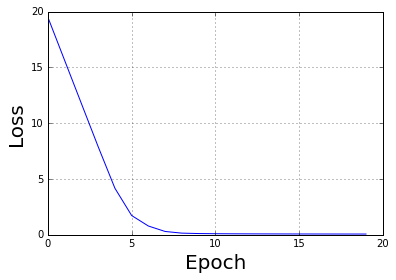

In [13]:
def plot_loss():
    plt.grid()
    plt.plot(l_cache)

    plt.ylabel('Loss', fontsize=20)
    plt.xlabel('Epoch', fontsize=20)
plot_loss()

# Visualizing the Loss Surface

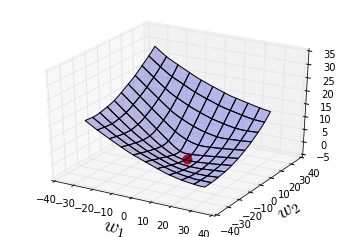

In [14]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

NX = 100
NY = 100

def compute_average_loss(X, w, b):
    total_loss = 0.0
    for i in range(X.shape[0]):
        x_i = X[i,:]
        y_i = y[i]
        z_i = w.dot(x_i) + b
        total_loss += compute_loss_numerically_stable(y_i, z_i)
    return (total_loss / X.shape[0])

xs = np.linspace(-30, 30, NX)
ys = np.linspace(-30, 30, NY)
xv, yv = np.meshgrid(xs, ys)

w_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)

losses = []
for i in range(w_fake.shape[0]):
    losses.append(compute_average_loss(X, w_fake[i,:], b_cache[-1])) # Get the last value of the bias b in the cache to assume that we have the correct value for b

losses = np.array(losses)
min_loss = np.min(losses)

def plot_error_surface(X, y, best_w):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    
    ax.plot_surface(xv, yv, losses.reshape(NX, NY), alpha=0.25)
    ax.scatter(best_w[0], best_w[1], [min_loss], s=80, color='red')
    
    ax.set_xlabel('$w_1$', fontsize=20)
    ax.set_ylabel('$w_2$', fontsize=20)
    
plot_error_surface(X, y, w_cache[-1])


### Animation

In [15]:
# Import for animation
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation

In [16]:
NX = 100
NY = 100

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlim3d([-40, 40])
ax.set_ylim3d([-40, 40])
ax.set_xlabel('$w_1$', fontsize=20)
ax.set_ylabel('$w_2$', fontsize=20)

ax.plot_surface(xv, yv, losses.reshape(NX, NY), alpha=0.25)

line_data = [[], [], []]
graph = ax.scatter([w_cache[0][0]], [w_cache[0][1]], [l_cache[0]], s=80, color='red')
lines, = ax.plot([], [], [], color='red')
text_box = ax.text(20.0, 20.0, 500.0, 'Iteration 0', fontsize=20)

def animate(i):
    graph.set_offsets([w_cache[i][0], w_cache[i][1]])
    graph.set_3d_properties([l_cache[i]], zdir='z')

    line_data[0].append(w_cache[i].flatten()[0])
    line_data[1].append(w_cache[i].flatten()[1])
    line_data[2].append(l_cache[i])

    lines.set_data(line_data[0], line_data[1])
    lines.set_3d_properties(line_data[2])

    text_box.set_text(f'Iteration: {i}')

    return graph, lines, text_box

anim = animation.FuncAnimation(fig, animate, len(w_cache), interval=500, blit=True)
plt.close(fig)
anim

# Decision Boundary

We predict **red** if

$
\frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(w_1 x_1 + w_2 x_2 + b)}} < 0.5
$

and **blue** otherwise.

Our **decison boundary** is:

$
\frac{1}{1+e^{-(w_1 x_1 + w_2 x_2 + b)}} = 0.5
$

We have:

$
1+e^{-(w_1 x_1 + w_2 x_2 + b)} = 2\\
e^{-(w_1 x_1 + w_2 x_2 + b)} = 1\\
-(w_1 x_1 + w_2 x_2 + b) = 0\\
w_1 x_1 + w_2 x_2 + b = 0\\
x_2 = \frac{-w_1 x_1 - b}{w_2}
$


Let's plot our final decision boundary:

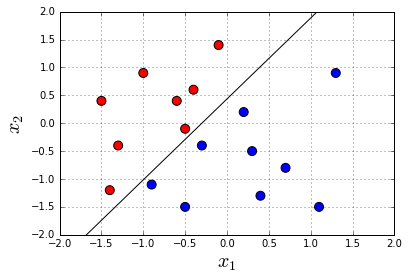

In [17]:
def plot_decision_boundary(X, y, w, b):
    plt.grid()
    plt.xlim(left=-2.0, right=2.0)
    plt.ylim(bottom=-2.0, top=2.0)

    plt.scatter(X[:,0], X[:,1], s=80, c=colormap[y])
    
    xs = np.array([-2.0, 2.0])
    ys = (-w[0] * xs - b) / w[1]

    plt.plot(xs, ys, c='black')

    plt.xlabel('$x_1$', fontsize=20)
    plt.ylabel('$x_2$', fontsize=20)

plot_decision_boundary(X, y, w_cache[-1], b_cache[-1])

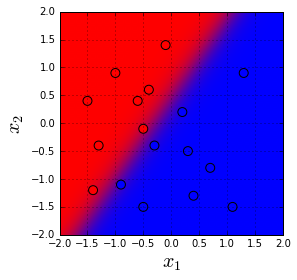

In [18]:
_#@title
NX = 100
NY = 100

def plot_decision_boundary_lazy(X, y, w, b):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', fontsize=20)
  plt.ylabel('$x_2$', fontsize=20)

  xs = np.linspace(-2.0, 2.0, NX)
  ys = np.linspace(2.0, -2.0, NY)
  xv, yv = np.meshgrid(xs, ys)

  X_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)

  predictions = []
  for i in range(X_fake.shape[0]):
    predictions.append(sigmoid(w.dot(X_fake[i,:]) + b))

  predictions = np.array(predictions)
  predictions = np.stack( (1-predictions, np.zeros(NX * NY), predictions) )
  plt.imshow(predictions.T.reshape(NX, NY, 3), extent=[-2.0, 2.0, -2.0, 2.0])
  plt.scatter(X[:, 0], X[:, 1], s=80, c=colormap[y])

plot_decision_boundary_lazy(X, y, w_cache[-1], b_cache[-1])

* Background **red** means our prediction is very close to 0. We are confident that any point in this area should be classified **red**.
* Background **blue** means our prediction is very close to 1. We are confident that any point in this area should be classified **blue**.
* The middle area with **purple** color means that our prediction is close to 0.5. We are not confident on our predictions for points in this area.

### Animation

In [19]:
import matplotlib.animation as animation

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim([-2.0, 2.0])
ax.set_ylim([-2.0, 2.0])
ax.set_xlabel('$x_1$', size=20)
ax.set_ylabel('$x_2$', size=20)

ax.set_title('Decision boundary - Animated', size = 18)

def animate(i):
  xs = np.array([-2.0, 2.0])
  ys = (-w_cache[i][0] * xs - b)/w_cache[i][1]
  lines.set_data(xs, ys)

  text_box.set_text('Iteration: {}'.format(i))

  return lines, text_box

lines, = ax.plot([], [], c='black')
ax.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
text_box = ax.text(1.1, 1.6, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate, len(w_cache), blit=True, interval=500)
plt.close(fig)
anim